In [11]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt

In [14]:
# Load dataset
df = pd.read_csv("/content/Data/predictive_maintenance_dataset.csv")

# Basic inspection
print(df.head())
print(df.info())
print(df['failure'].value_counts())

       date    device  failure    metric1  metric2  metric3  metric4  metric5  \
0  1/1/2015  S1F01085        0  215630672       55        0       52        6   
1  1/1/2015  S1F0166B        0   61370680        0        3        0        6   
2  1/1/2015  S1F01E6Y        0  173295968        0        0        0       12   
3  1/1/2015  S1F01JE0        0   79694024        0        0        0        6   
4  1/1/2015  S1F01R2B        0  135970480        0        0        0       15   

   metric6  metric7  metric8  metric9  
0   407438        0        0        7  
1   403174        0        0        0  
2   237394        0        0        0  
3   410186        0        0        0  
4   313173        0        0        3  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   date     124494 non-null  object
 1   device   124494 non-null  object
 2   failu

# New Section

In [ ]:
# Load dataset
df = pd.read_csv("/content/Data/predictive_maintenance_dataset.csv")

# Basic inspection
print(df.head())
print(df.info())
print(df['failure'].value_counts())

       date    device  failure    metric1  metric2  metric3  metric4  metric5  \
0  1/1/2015  S1F01085        0  215630672       55        0       52        6   
1  1/1/2015  S1F0166B        0   61370680        0        3        0        6   
2  1/1/2015  S1F01E6Y        0  173295968        0        0        0       12   
3  1/1/2015  S1F01JE0        0   79694024        0        0        0        6   
4  1/1/2015  S1F01R2B        0  135970480        0        0        0       15   

   metric6  metric7  metric8  metric9  
0   407438        0        0        7  
1   403174        0        0        0  
2   237394        0        0        0  
3   410186        0        0        0  
4   313173        0        0        3  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   date     124494 non-null  object
 1   device   124494 non-null  object
 2   failu

In [15]:
# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

# Drop identifiers (not useful for prediction)
df = df.drop(columns=['date', 'device'])

In [16]:
X = df.drop(columns=['failure'])
y = df['failure']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

In [22]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
log_reg = LogisticRegression(
    class_weight='balanced',
    max_iter=1000,
    random_state=42
)

log_reg.fit(X_train_scaled, y_train)

y_pred_lr = log_reg.predict(X_test_scaled)
y_prob_lr = log_reg.predict_proba(X_test_scaled)[:, 1]

In [24]:
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

roc_auc_lr = roc_auc_score(y_test, y_prob_lr)
print("ROC-AUC:", roc_auc_lr)

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     31097
           1       0.01      0.52      0.02        27

    accuracy                           0.95     31124
   macro avg       0.50      0.73      0.50     31124
weighted avg       1.00      0.95      0.97     31124

Confusion Matrix:
[[29493  1604]
 [   13    14]]
ROC-AUC: 0.758614323877854


In [26]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

In [27]:
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
print("ROC-AUC:", roc_auc_rf)

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31097
           1       0.01      0.04      0.01        27

    accuracy                           1.00     31124
   macro avg       0.50      0.52      0.51     31124
weighted avg       1.00      1.00      1.00     31124

Confusion Matrix:
[[30987   110]
 [   26     1]]
ROC-AUC: 0.6772684991645019


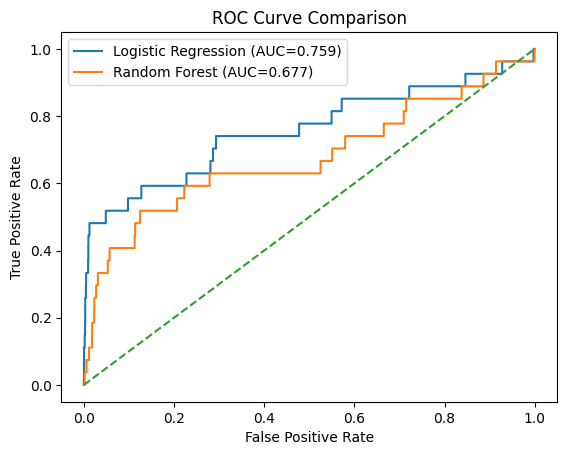

In [28]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.figure()
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC={roc_auc_lr:.3f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC={roc_auc_rf:.3f})")
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

In [29]:
importances = rf.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

print(importance_df)

   feature  importance
3  metric4    0.237226
1  metric2    0.174684
5  metric6    0.148912
0  metric1    0.124641
7  metric8    0.103319
6  metric7    0.085748
4  metric5    0.076060
8  metric9    0.033048
2  metric3    0.016364


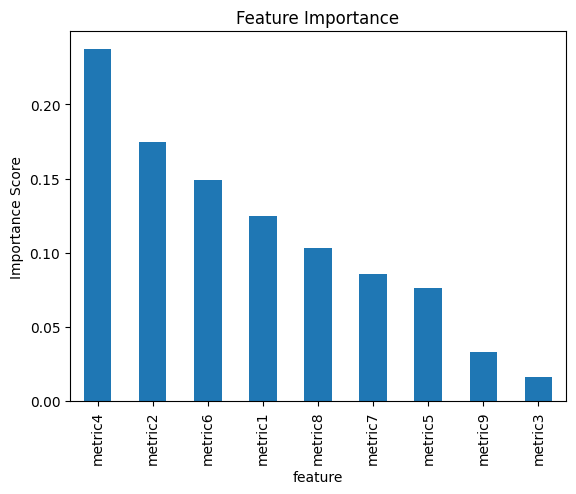

In [30]:
importance_df.plot(
    x='feature',
    y='importance',
    kind='bar',
    legend=False,
    title='Feature Importance'
)
plt.ylabel("Importance Score")
plt.show()